In [3]:
from cmdstanpy import cmdstan_path, CmdStanModel

import arviz as az
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [4]:
import cmdstanpy
cmdstanpy.install_cmdstan()
a=cmdstan_path()

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


In [7]:
# Importing 2018-19 season results
#X = pd.read_excel("/Users/alessandropreti/jupyter/progetto bayesian /data/SerieA_basket.xlsx", sheet_name = "Stagione 2018-19")
X = pd.read_excel("SerieA_basket.xlsx", sheet_name = "Stagione 2018-19")
cols = X.columns
X.head()

,Date,Team,PTS,Opp,PTS2
0,"Sat, Oct 6, 2018",Red October Cantù,81,Sidigas Avellino,98
1,"Sat, Oct 6, 2018",Vanoli Cremona,104,Dolomiti Energia Trentino,99
2,"Sun, Oct 7, 2018",Happy Casa Brindisi,92,AX Armani Exchange Milano,103
3,"Sun, Oct 7, 2018",OriOra Pistoia,77,VL Pesaro,83
4,"Sun, Oct 7, 2018",Banco di Sardegna Sassari,77,Grissin Bon Reggio Emilia,85


In [8]:
# Importing 2018-19 season results (used for skill parameters initialization)
#X_old = pd.read_excel("/Users/alessandropreti/jupyter/progetto bayesian /data/SerieA_basket.xlsx", sheet_name = "Stagione 2017-18")
X_old = pd.read_excel("SerieA_basket.xlsx", sheet_name = "Stagione 2017-18")
cols_old = X.columns
X_old.head()

,Date,Team,PTS,Opp,PTS2
0,"Sat, Sep 30, 2017",Virtus Segafredo Bologna,74,Dolomiti Energia Trentino,78
1,"Sun, Oct 1, 2017",FIAT Torino,72,Happy Casa Brindisi,67
2,"Sun, Oct 1, 2017",EA7 Emporio Armani Milano,76,Vanoli Cremona,60
3,"Sun, Oct 1, 2017",Germani Basket Brescia,73,VL Pesaro,70
4,"Sun, Oct 1, 2017",Red October Cantù,80,Banco di Sardegna Sassari,94


In [9]:
Y = np.array([1 if(X.iloc[i,2]-X.iloc[i,4]>0) else(0) for i in range(X.shape[0])])
X['Y']=Y.tolist()
X.head()

,Date,Team,PTS,Opp,PTS2,Y
0,"Sat, Oct 6, 2018",Red October Cantù,81,Sidigas Avellino,98,0
1,"Sat, Oct 6, 2018",Vanoli Cremona,104,Dolomiti Energia Trentino,99,1
2,"Sun, Oct 7, 2018",Happy Casa Brindisi,92,AX Armani Exchange Milano,103,0
3,"Sun, Oct 7, 2018",OriOra Pistoia,77,VL Pesaro,83,0
4,"Sun, Oct 7, 2018",Banco di Sardegna Sassari,77,Grissin Bon Reggio Emilia,85,0


In [10]:
Y_old = np.array([1 if(X_old.iloc[i,2]-X_old.iloc[i,4]>0) else(0) for i in range(X_old.shape[0])])
X_old['Y']=Y_old.tolist()
X_old.head()

,Date,Team,PTS,Opp,PTS2,Y
0,"Sat, Sep 30, 2017",Virtus Segafredo Bologna,74,Dolomiti Energia Trentino,78,0
1,"Sun, Oct 1, 2017",FIAT Torino,72,Happy Casa Brindisi,67,1
2,"Sun, Oct 1, 2017",EA7 Emporio Armani Milano,76,Vanoli Cremona,60,1
3,"Sun, Oct 1, 2017",Germani Basket Brescia,73,VL Pesaro,70,1
4,"Sun, Oct 1, 2017",Red October Cantù,80,Banco di Sardegna Sassari,94,0


(array([168.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 104.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

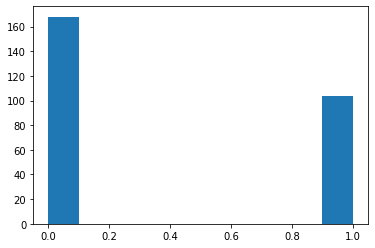

In [11]:
plt.hist(Y)

(array([  1.,   0.,   0.,   0.,  11.,  65., 107.,  71.,  13.,   4.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

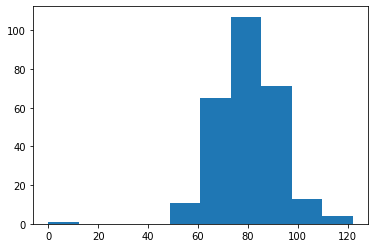

In [12]:
plt.hist(X.iloc[:,2])

(array([ 1.,  0.,  0.,  1., 17., 57., 96., 50., 36., 14.]),
 array([ 20. ,  29.5,  39. ,  48.5,  58. ,  67.5,  77. ,  86.5,  96. ,
        105.5, 115. ]),
 <a list of 10 Patch objects>)

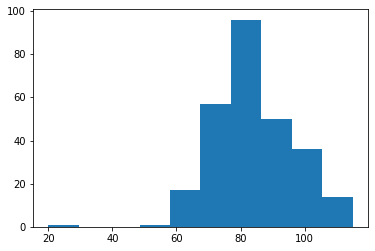

In [13]:
plt.hist(X.iloc[:,4])

In [14]:
Teams_old=list(X_old.iloc[:,1].unique())
Teams_old=sorted(Teams_old)

In [15]:
Teams=list(X.iloc[:,1].unique())
Teams=sorted(Teams)
#len(Teams)

In [16]:
Teams_old

['Banco di Sardegna Sassari',
 "Betaland Capo d'Orlando",
 'Dolomiti Energia Trentino',
 'EA7 Emporio Armani Milano',
 'FIAT Torino',
 'Germani Basket Brescia',
 'Grissin Bon Reggio Emilia',
 'Happy Casa Brindisi',
 'Openjobmetis Varese',
 'Red October Cantù',
 'Sidigas Avellino',
 'The Flexx Pistoia',
 'Umana Reyer Venezia',
 'VL Pesaro',
 'Vanoli Cremona',
 'Virtus Segafredo Bologna']

In [17]:
Teams

['AX Armani Exchange Milano',
 'Alma Pallacanestro Trieste',
 'Banco di Sardegna Sassari',
 'Dolomiti Energia Trentino',
 'FIAT Torino',
 'Germani Basket Brescia',
 'Grissin Bon Reggio Emilia',
 'Happy Casa Brindisi',
 'Openjobmetis Varese',
 'OriOra Pistoia',
 'Red October Cantù',
 'Sidigas Avellino',
 'Umana Reyer Venezia',
 'VL Pesaro',
 'Vanoli Cremona',
 'Virtus Segafredo Bologna']

#### Note on teams:

Between the two seasons: 

1.   Armani Milano changed name
2.   Pistoia changed name as well
3.   Betaland Capo D'Orlando was demoted, his skill rate will be given to Alma Pallacanestro Trieste wich was newly promoted



In [18]:
X_old.loc[X_old.Team == 'EA7 Emporio Armani Milano', 'Team'] = 'AX Armani Exchange Milano'
X_old.loc[X_old.Opp == 'EA7 Emporio Armani Milano', 'Opp'] = 'AX Armani Exchange Milano'

X_old.loc[X_old.Team == 'The Flexx Pistoia', 'Team'] = 'OriOra Pistoia'
X_old.loc[X_old.Opp == 'The Flexx Pistoia', 'Opp'] = 'OriOra Pistoia'

X_old.loc[X_old.Team == "Betaland Capo d'Orlando", 'Team'] = 'Alma Pallacanestro Trieste'
X_old.loc[X_old.Opp == "Betaland Capo d'Orlando", 'Opp'] = 'Alma Pallacanestro Trieste'

Teams_old=list(X_old.iloc[:,1].unique())
Teams_old=sorted(Teams_old)

In [19]:
Teams == Teams_old

True

In [20]:
X['Team'].value_counts()

Umana Reyer Venezia           23
Banco di Sardegna Sassari     22
Vanoli Cremona                19
Dolomiti Energia Trentino     18
Sidigas Avellino              18
AX Armani Exchange Milano     18
Happy Casa Brindisi           17
Alma Pallacanestro Trieste    17
Red October Cantù             15
OriOra Pistoia                15
Virtus Segafredo Bologna      15
Germani Basket Brescia        15
FIAT Torino                   15
Grissin Bon Reggio Emilia     15
VL Pesaro                     15
Openjobmetis Varese           15
Name: Team, dtype: int64

In [21]:
X['Opp'].value_counts()

Umana Reyer Venezia           24
Banco di Sardegna Sassari     21
AX Armani Exchange Milano     20
Vanoli Cremona                20
Sidigas Avellino              17
Dolomiti Energia Trentino     17
Alma Pallacanestro Trieste    17
Happy Casa Brindisi           16
VL Pesaro                     15
Grissin Bon Reggio Emilia     15
Openjobmetis Varese           15
FIAT Torino                   15
Germani Basket Brescia        15
Red October Cantù             15
OriOra Pistoia                15
Virtus Segafredo Bologna      15
Name: Opp, dtype: int64

In [22]:
max(X['Opp'].value_counts())

24

In [23]:
len(Teams)

16

In [24]:
def names_to_index(Teams):

    """
    Creates a dictionary that associates teams to number
    """
    # dictionary comprehension
    d = {index: value for value, index in enumerate(Teams)}

    return d

In [25]:
def crea_matrici(X):
    """
    Takes as input a matrix X and their result to create two additional matrices that can be used for our model
    """
    #matrice casa trasferta risultato in numeri (N_match, 3)
    Y = np.array([1 if(X.iloc[i,2]-X.iloc[i,4]>0) else(0) for i in range(X.shape[0])])
    
    Teams=list(X.iloc[:,1].unique())
    Teams=sorted(Teams)
    d = names_to_index(Teams)
    
    T_1 = np.array([d[X.iloc[i,1]] for i in range(X.shape[0])])
    T_2 = np.array([d[X.iloc[i,3]] for i in range(X.shape[0])])
    R = pd.DataFrame({"Home":T_1,"Away":T_2,"Result":Y})
    
    #matrice di storie delle squadre, casa-trasferta (N_Teams, 2)
    dim_vec_home = R['Home'].value_counts()
    dim_vec_away = R['Away'].value_counts()
    
    R2 = pd.DataFrame(index = sorted(np.unique(T_1)), columns = ["Home", "Away"])
    
    for i in range(len(np.unique(T_1))):
        R2["Home"][i] = np.empty(0,dtype = np.int8)
        R2["Away"][i] = np.empty(0,dtype = np.int8)
        
    for i in range(len(T_1)):
        h = R["Home"][i]
        a = R["Away"][i]
        R2["Home"][h] = np.append(R2["Home"][h],R["Result"][i])
        R2["Away"][a] = np.append(R2["Away"][a], 1 - R["Result"][i])
    m=max(max(X['Opp'].value_counts()),max(X['Team'].value_counts()))
    print('The length of the array is: ',m)
    for i in range(R2.shape[0]):
      while(len(R2["Home"][i])<m):
        R2["Home"][i]=np.append(R2["Home"][i],0)
      while(len(R2["Away"][i])<m):
        R2["Away"][i]=np.append(R2["Away"][i],0)
    
    
    return R,R2


In [26]:
def compute_skills(R,R2,init_home,init_away):
    """
    Takes as inputs a matrix X with teams and their result
    init is the inizialization of the skills, must be an array or list with the skill for each team.

    Returns two matrices with home and away skills parameters by team 
    and one matrix with skills parameters oredered cronologically
    """
    import numpy as np
    import pandas as pd

    N=R.shape[0] # number of matches
    
    #Lambda initialization
    l1 = 0.5
    l2 = 0.5

    #Creating matrices to store the skill parameters and their stories
        
    HS = pd.DataFrame(index = R2.index, columns = ["Home", "Away"])
    
    for i in range(R2.shape[0]):
        HS["Home"][i] = np.empty(0)
        HS["Away"][i] = np.empty(0)
        
    data = pd.DataFrame(index = R.index, columns=['Home','Away'])
    C = pd.DataFrame({"Home": np.zeros(len(R2.index), dtype = np.int8), "Away": np.zeros(len(R2.index), dtype = np.int8)})
    
    for i in range(R.shape[0]):
        h = R["Home"][i]
        a = R["Away"][i]

    # HOME SKILL
        if(C["Home"][h]==0):
          xh = init_home[h]
        else:
          #calcolo somma per xh
          sh = 0
          for j in range(C["Home"][h]):
              sh = sh + R2["Home"][h][j]*(1-l1)**j
        
          xh = l1*sh + init_home[h]*(1-l1)**C["Home"][h]

     # AWAY SKILL       
        if(C["Away"][a]==0):
          xv = init_away[a]
        else:
          #calcolo somma per xv
          sa = 0
          for j in range(C["Away"][a]):
             sa = sa + R2["Away"][a][j]*(1-l2)**j
        
          xv = l2*sa + init_away[a]*(1-l2)**C["Away"][a]
        
        #append nostra matrice storico e dati per stan
        HS["Home"][h] = np.append(HS["Home"][h],round(xh,3))
        HS["Away"][a] = np.append(HS["Away"][a],round(xv,3))
        data["Home"][i] = round(xh,3)
        data["Away"][i] = round(xv,3)
        
        #incremento counts
        C["Home"][h] += 1
        C["Away"][a] += 1

    
    return HS,data

The length of the array is:  23


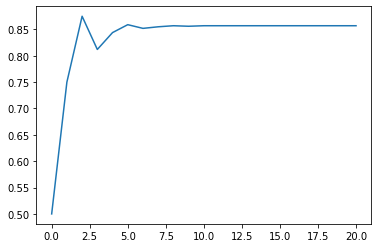

In [27]:
R_old, R2_old = crea_matrici(X_old)
HS_old, data_old = compute_skills(R_old, R2_old, 0.5*np.ones(len(Teams)), 0.5*np.ones(len(Teams)))

plt.plot(HS_old["Home"][0])

In [28]:
init_home = np.empty(0)
init_away = np.empty(0)

for i in range(HS_old.shape[0]):
  init_home = np.append(init_home,HS_old["Home"][i][-1])
  init_away = np.append(init_away,HS_old["Away"][i][-1])

The length of the array is:  24


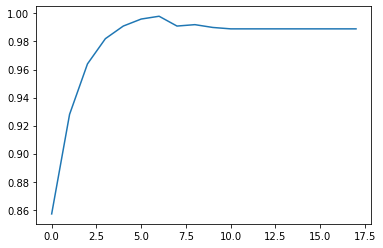

In [29]:
R,R2 = crea_matrici(X)
HS, data = compute_skills(R, R2, init_home, init_away)

plt.plot(HS["Home"][0])

In [30]:
logit_reg='''

data{
    int<lower=0> N;
    array[N] int y;
    matrix[N,2] X;
}

parameters{
    real mu0;
    real sigma0;
    real intercept;
    vector[2] beta;
}

transformed parameters {
  vector[N] mu;
  for(i in 1:N) {
  mu[i] = row(X, i) * beta;
    }

}

model {
    mu0 ~ normal(0, 10);
    sigma0 ~ inv_gamma(1, 100);
    
    intercept ~ normal(mu0,pow(sigma0, 2));

    beta[1] ~ normal(0,3);

    beta[1] ~ normal(0,3);

    for (i in 1:N){
        y[i] ~ bernoulli_logit(intercept + mu[i]);
   }
}
'''

stan_file = "./logit.stan"

with open(stan_file, "w") as f:
    print(logit_reg, file=f)

logit_reg = CmdStanModel(stan_file=stan_file)

06:40:01 - cmdstanpy - INFO - compiling stan file /content/logit.stan to exe file /content/logit
INFO:cmdstanpy:compiling stan file /content/logit.stan to exe file /content/logit
DEBUG:cmdstanpy:cmd: make /content/logit
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/logit.hpp /content/logit.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/logit.o /content/logit.hpp
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-

In [31]:
logit_reg='''

data{
    int<lower=0> N;
    array[N] int y;
    matrix[N,2] X;
}

parameters{
    real mu0;
    real sigma0;
    real beta0;
    real beta1;
    real beta2;
}

transformed parameters {
  vector[N] mu;
  vector[3] beta;
  beta[1] = beta0;
  beta[2] = beta1;
  beta[3] = beta2;

  for(i in 1:N) {
  mu[i] = row(X, i) * beta[2:3];
    }

}

model {
    mu0 ~ normal(0, 10);
    sigma0 ~ inv_gamma(1, 100);
    
    beta0 ~ normal(mu0,pow(sigma0, 2));

    beta1 ~ normal(0,3);

    beta2 ~ normal(0,3);

    for (i in 1:N){
        y[i] ~ bernoulli_logit(beta[1] + mu[i]);
   }
}
'''

stan_file = "./logit.stan"

with open(stan_file, "w") as f:
    print(logit_reg, file=f)

logit_reg = CmdStanModel(stan_file=stan_file)

DEBUG:cmdstanpy:Removing /content/logit
06:40:16 - cmdstanpy - INFO - compiling stan file /content/logit.stan to exe file /content/logit
INFO:cmdstanpy:compiling stan file /content/logit.stan to exe file /content/logit
DEBUG:cmdstanpy:cmd: make /content/logit
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/logit.hpp /content/logit.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/logit.o /content/logit.hpp
g++ -std=c++1y -pthr

In [32]:
model_data={"N":len(Y), "y":Y, "X":data.values.tolist()}

model_fit=logit_reg.sample(data=model_data, chains=4,
                           parallel_chains=4, iter_warmup=1000,
                           iter_sampling=5000, adapt_delta=0.999,
                           step_size = 0.5, max_treedepth = 15)
#model_fit=logit_reg.sample(data=model_data, chains=4, parallel_chains=4, iter_warmup=1000,iter_sampling=2000)
model_data=az.from_cmdstanpy(model_fit)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8wctuyt/jmg63vmq.json
DEBUG:cmdstanpy:cmd: /content/logit info
cwd: None
06:40:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/logit', 'id=2', 'random', 'seed=13979', 'data', 'file=/tmp/tmpp8wctuyt/jmg63vmq.json', 'output', 'file=/tmp/tmpp8wctuyt/logith39kjok6/logit-20230213064029_2.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'engine=nuts', 'max_depth=15', 'stepsize=0.5', 'adapt', 'engaged=1', 'delta=0.999']
DEBUG:cmdstanpy:CmdStan args: ['/content/logit', 'id=1', 'random', 'seed=13979', 'data', 'file=/tmp/tmpp8wctuyt/jmg63vmq.json', 'output', 'file=/tmp/tmpp8wctuyt/logith39kjok6/logit-20230213064029_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'engine=nuts', 'max_depth=15', 'stepsize=0.5', 'adapt', 'engaged=1', 'delta=0.999']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/logit

06:42:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/logit', 'id=1', 'random', 'seed=13979', 'data', 'file=/tmp/tmpp8wctuyt/jmg63vmq.json', 'output', 'file=/tmp/tmpp8wctuyt/logith39kjok6/logit-20230213064029_1.csv', 'method=sample', 'num_samples=5000', 'num_warmup=1000', 'algorithm=hmc', 'engine=nuts', 'max_depth=15', 'stepsize=0.5', 'adapt', 'engaged=1', 'delta=0.999']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpp8wctuyt/logith39kjok6/logit-20230213064029_1.csv
 console_msgs (if any):
	/tmp/tmpp8wctuyt/logith39kjok6/logit-20230213064029_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 5000
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000

In [33]:
cmdstanpy_data = az.from_cmdstanpy(model_fit)
np.sum(cmdstanpy_data.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

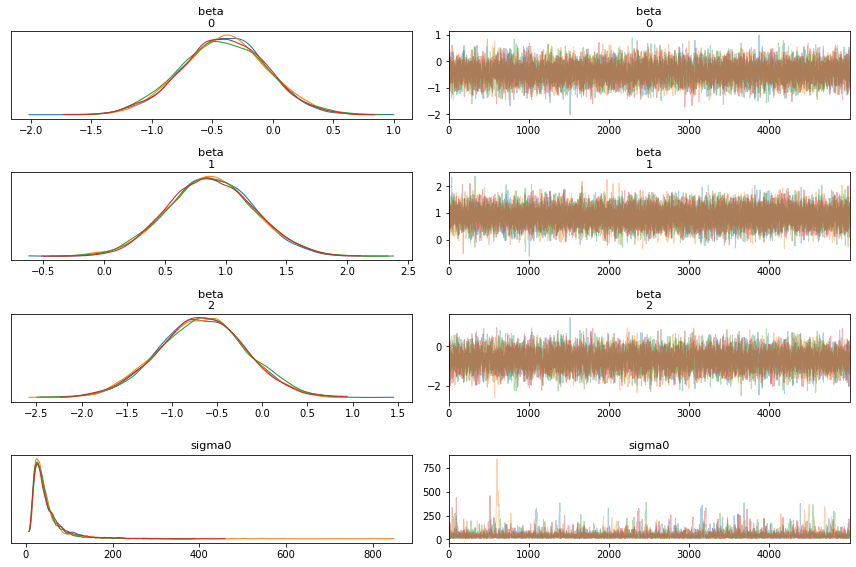

In [34]:
az.plot_trace(model_data, var_names=["beta","sigma0"], compact=False)
plt.tight_layout()
plt.savefig('vanillabasket1')
plt.show()